In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_ss=pd.read_csv('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv')
df_tr=pd.read_csv('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv')
print('Training Data sample')
print(df_tr.head())
print("\nData description")
print(df_tr.info())
print(df_tr.describe(include='all'))
print('-------------\n Submission Sample')
print(df_ss.head())
print(df_ss.info())
print(df_ss.describe(include='all'))



Training Data sample
                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN  

Data description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [17]:
print(df_tr['class_name'].value_counts())

class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64


 Found 18000 DICOM files.
Example file path: /kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom


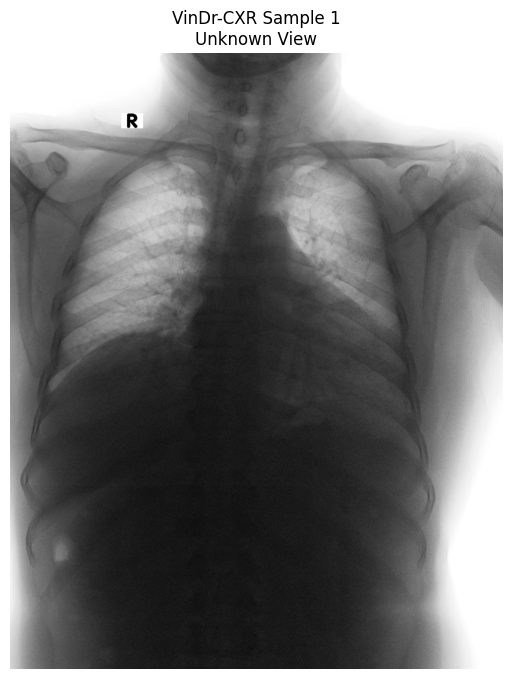

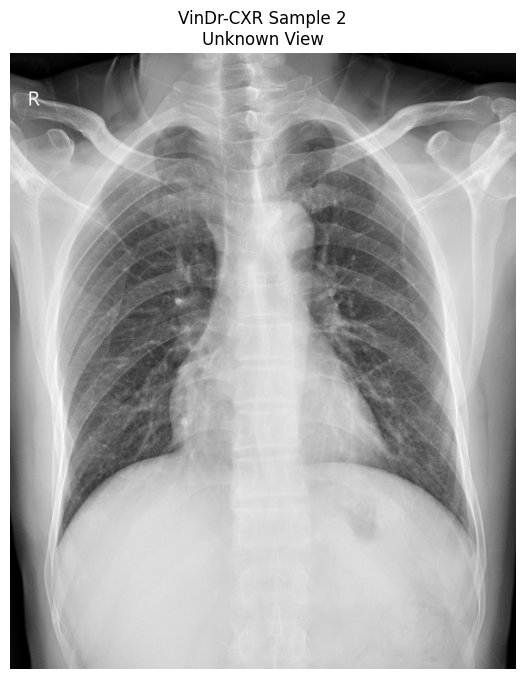

In [18]:

# Step 1: Automatically find the folder containing DICOMs
dicom_files = []
for root, _, files in os.walk('/kaggle/input'):
    for f in files:
        if f.lower().endswith(('.dcm', '.dicom')):
            dicom_files.append(os.path.join(root, f))

# Step 2: Check if any files found
if len(dicom_files) == 0:
    print("No DICOM files found in /kaggle/input. Check your dataset structure.")
else:
    print(f" Found {len(dicom_files)} DICOM files.")
    print("Example file path:", dicom_files[0])

    # Step 3: Visualize first two DICOMs with metadata
    for i in range(min(2, len(dicom_files))):
        dicom_path = dicom_files[i]
        dicom_data = pydicom.dcmread(dicom_path)
        image = dicom_data.pixel_array

        # Normalize for better visualization
        image = (image - image.min()) / (image.max() - image.min())
        # Display image
        plt.figure(figsize=(8,8))
        plt.imshow(image, cmap='gray')
        plt.title(f"VinDr-CXR Sample {i+1}\n{dicom_data.get('ViewPosition', 'Unknown View')}")
        plt.axis('off')
        plt.show()


In [21]:
img_id = "9a5094b2563a1ef3ff50dc5c7ff71345"  
df_tr[df_tr["image_id"] == img_id]


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
5517,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,10,R9,1789.0,1729.0,1875.0,1992.0
25023,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,11,R9,1789.0,1729.0,1875.0,1992.0
26165,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R9,692.0,1375.0,1657.0,1799.0
42709,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R8,689.0,1313.0,1666.0,1763.0
53473,9a5094b2563a1ef3ff50dc5c7ff71345,Aortic enlargement,0,R9,1052.0,715.0,1299.0,966.0


In [1]:
import numpy as np

def normalize(img):
    img_min = np.min(img)
    img_max = np.max(img)
    img = (img - img_min) / (img_max - img_min)
    return img


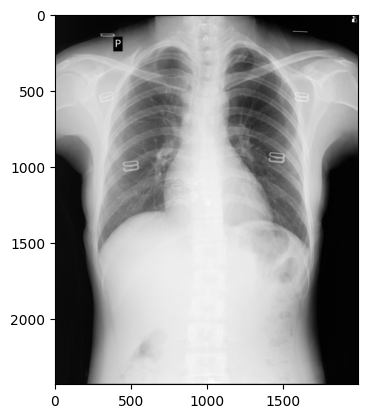

In [10]:
import os
import pydicom
'''
input_dir = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/"
output_dir = "/kaggle/working/preprocessed/"

os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(input_dir):
    if file.endswith(".dicom"):
        dcm = pydicom.dcmread(os.path.join(input_dir, file))
        img = dcm.pixel_array.astype("float32")

        img = normalize(img)

        # save as a numpy file
        np.save(os.path.join(output_dir, file.replace(".dicom", ".npy")), img)
'''

# Load DICOM
dcm = pydicom.dcmread("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/56d8197180bcebfbf00bb64cc694ea8c.dicom")
img = dcm.pixel_array.astype("float32")

# Apply preprocessing
img_norm = normalize(img)
plt.imshow(img, cmap='gray')        
plt.show()